In [2]:
#import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import datetime
from scipy.stats import linregress

In [3]:
#import the cleaned mls data

#file path
file = "DataCleaning/CleanedMLSData.csv"

#read the file into pandas and view info
mls_df = pd.read_csv(file, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
mls_df.head()

,MLS #,Status,Address,City,Zip Code,List Price,Original List Price,SqFt Total,Close Price,RATIO Current Price By SQFT,...,Status Change Timestamp,List Agent Full Name,Buyers/SubAgent Full Name,HOA,MLS SubArea,Property Sub Type,Property Type,RATIO Close Price By List Price,School District,Subdivision Name
0,14112331,S,452 Vincent Street,Cedar Hill,75104,95000.0,95000.0,1310.0,109300.0,83.44,...,2019-07-04,Krista Stotler,Cassandra Jones,None,CEDAR HILL (10),RES-Single Family,Residential,1.1505299999999998,Cedar Hill ISD,Highlands 03 & 08 02 Rep
1,14075152,S,914 S Cedar Hill Road,Cedar Hill,75104,119000.0,119000.0,1260.0,111268.0,88.31,...,2019-06-06,Leslie Armstrong,Carlos Silva,None,CEDAR HILL (13),RES-Single Family,Residential,0.9350299999999999,Cedar Hill ISD,Cedar Hill
2,14088584,S,1015 Vedral Place,Cedar Hill,75104,110000.0,110000.0,1002.0,112000.0,111.78,...,2019-06-03,Richard Garropy,Mayra Cardenas,Mandatory,CEDAR HILL (3),RES-Condo,Residential,1.0181799999999999,Cedar Hill ISD,Cedars Condo
3,14086347,S,309 Aquarius Drive,Cedar Hill,75104,129900.0,129900.0,1085.0,120000.0,110.6,...,2019-06-24,Dianna Jones,Dianna Jones,None,CEDAR HILL (13),RES-Single Family,Residential,0.92379,Cedar Hill ISD,South Hills Park 01
4,14094254,S,1114 Saturn Drive,Cedar Hill,75104,119900.0,119900.0,1031.0,120000.0,116.39,...,2019-06-25,Gail Griggs,Angela Hudson,None,CEDAR HILL (13),RES-Single Family,Residential,1.0008299999999999,Cedar Hill ISD,South Hills Park 01


In [4]:
#convert all number data types to float or integer
mls_df[["MLS #"]] = mls_df[["MLS #"]].apply(pd.to_numeric)
mls_df[["List Price"]] = mls_df[["List Price"]].astype(float)
mls_df[["Original List Price"]] = mls_df[["Original List Price"]].astype(float)

mls_df[["SqFt Total", "Close Price", "Number Of Stories", "RATIO Current Price By SQFT", 
        "Beds Total", "Baths Total", "Parking Spaces Garage", "Lot Size Area", "DOM", 
        "RATIO Close Price By List Price", "Zip Code"]] \
= mls_df[["SqFt Total", "Close Price", "Number Of Stories", "RATIO Current Price By SQFT", 
          "Beds Total", "Baths Total", "Parking Spaces Garage", "Lot Size Area", "DOM", 
          "RATIO Close Price By List Price", "Zip Code"]].apply(pd.to_numeric)

mls_df[["Yr Built"]] = mls_df[["Yr Built"]].astype(float)

#convert all dates to date
mls_df[["Listing Date"]] = pd.to_datetime(mls_df["Listing Date"], format='%Y-%M-%d')
mls_df[["Close Date"]] = pd.to_datetime(mls_df["Close Date"], format='%Y-%M-%d')
mls_df[["Expiration Date"]] = pd.to_datetime(mls_df["Expiration Date"], format='%Y-%M-%d')
mls_df[["Cancelled Date"]] = pd.to_datetime(mls_df["Cancelled Date"], format='%Y-%M-%d')
mls_df[["Status Change Timestamp"]] = pd.to_datetime(mls_df["Status Change Timestamp"], format='%Y-%M-%d')

#convert all strings from objects to string

mls_df[['Status', 'Address', 'City', 'List Agent Full Name', 'Buyers/SubAgent Full Name', 
        'MLS SubArea', 'Property Sub Type', 'Property Type', 'School District', 'Subdivision Name', 'HOA', 'Pool']] \
= mls_df[['Status', 'Address', 'City', 'List Agent Full Name', 'Buyers/SubAgent Full Name', 
        'MLS SubArea', 'Property Sub Type', 'Property Type', 'School District', 'Subdivision Name', 'HOA', 'Pool']].convert_dtypes()
    
mls_df['Status'] = mls_df['Status'].convert_dtypes()

mls_df.dtypes

MLS #                                       int64
Status                                     string
Address                                    string
City                                       string
Zip Code                                    int64
List Price                                float64
Original List Price                       float64
SqFt Total                                float64
Close Price                               float64
RATIO Current Price By SQFT               float64
Number Of Stories                         float64
Beds Total                                  int64
Baths Total                               float64
Parking Spaces Garage                     float64
Lot Size Area                             float64
Yr Built                                  float64
Pool                                       string
DOM                                         int64
Listing Date                       datetime64[ns]
Close Date                         datetime64[ns]


In [5]:
#get list of column values
#df.columns.values.tolist()

In [6]:
#create new DataFrame of only sold (S) properties and narrow the columns
columns = ['MLS #','Status','Address','City','List Price',
           'Original List Price','SqFt Total','Close Price',
           'RATIO Current Price By SQFT','Number Of Stories','Beds Total',
           'Baths Total','Parking Spaces Garage','Lot Size Area','Yr Built',
            'Pool','DOM','Listing Date','Close Date', 'List Agent Full Name',
            'Buyers/SubAgent Full Name', 'RATIO Close Price By List Price',
            'School District', 'Subdivision Name','Zip Code']

sold_mls_df = mls_df.loc[mls_df["Status"] == "S", columns]

sold_mls_df["Status"].unique()

<StringArray>
['S']
Length: 1, dtype: string

In [7]:
sold_mls_df.dtypes

MLS #                                       int64
Status                                     string
Address                                    string
City                                       string
List Price                                float64
Original List Price                       float64
SqFt Total                                float64
Close Price                               float64
RATIO Current Price By SQFT               float64
Number Of Stories                         float64
Beds Total                                  int64
Baths Total                               float64
Parking Spaces Garage                     float64
Lot Size Area                             float64
Yr Built                                  float64
Pool                                       string
DOM                                         int64
Listing Date                       datetime64[ns]
Close Date                         datetime64[ns]
List Agent Full Name                       string


In [8]:
sold_mls_df.head()

,MLS #,Status,Address,City,List Price,Original List Price,SqFt Total,Close Price,RATIO Current Price By SQFT,Number Of Stories,...,Pool,DOM,Listing Date,Close Date,List Agent Full Name,Buyers/SubAgent Full Name,RATIO Close Price By List Price,School District,Subdivision Name,Zip Code
0,14112331,S,452 Vincent Street,Cedar Hill,95000.0,95000.0,1310.0,109300.0,83.44,1.0,...,No,5,2019-01-09 00:06:00,2019-01-25 00:06:00,Krista Stotler,Cassandra Jones,1.15053,Cedar Hill ISD,Highlands 03 & 08 02 Rep,75104
1,14075152,S,914 S Cedar Hill Road,Cedar Hill,119000.0,119000.0,1260.0,111268.0,88.31,1.0,...,No,15,2019-01-02 00:05:00,2019-01-04 00:06:00,Leslie Armstrong,Carlos Silva,0.93503,Cedar Hill ISD,Cedar Hill,75104
2,14088584,S,1015 Vedral Place,Cedar Hill,110000.0,110000.0,1002.0,112000.0,111.78,2.0,...,Yes,8,2019-01-11 00:05:00,2019-01-31 00:05:00,Richard Garropy,Mayra Cardenas,1.01818,Cedar Hill ISD,Cedars Condo,75104
3,14086347,S,309 Aquarius Drive,Cedar Hill,129900.0,129900.0,1085.0,120000.0,110.60,1.0,...,No,2,2019-01-11 00:05:00,2019-01-21 00:06:00,Dianna Jones,Dianna Jones,0.92379,Cedar Hill ISD,South Hills Park 01,75104
4,14094254,S,1114 Saturn Drive,Cedar Hill,119900.0,119900.0,1031.0,120000.0,116.39,1.0,...,No,4,2019-01-19 00:05:00,2019-01-04 00:06:00,Gail Griggs,Angela Hudson,1.00083,Cedar Hill ISD,South Hills Park 01,75104


In [9]:
#count how many sales per zipcode

zipcode_counts = sold_mls_df["Zip Code"].value_counts()
zipcode_counts

75043    3918
75206    3659
75214    3545
75115    3498
75219    3399
         ... 
75067      64
75151      30
75226      22
75287      18
75125       1
Name: Zip Code, Length: 89, dtype: int64

In [10]:
#get counts of unique zipcodes
zipcode_counts_df = pd.DataFrame(zipcode_counts)

zipcode_counts_df

,Zip Code
75043,3918
75206,3659
75214,3545
75115,3498
75219,3399
...,...
75067,64
75151,30
75226,22
75287,18


In [11]:
#export as csv to sort ascending and manually check against combinedmlsdata.csv. 
#Look up the outliers and change in combinedmlsdata.csv and save.
##zip_csv_data = zipcode_counts_df.to_csv("ZipMLSData.csv", index=True, encoding='utf-8')

In [12]:
sold_mls_df.count()

MLS #                              133245
Status                             133245
Address                            133245
City                               133245
List Price                         133245
Original List Price                133230
SqFt Total                         133245
Close Price                        133245
RATIO Current Price By SQFT        133229
Number Of Stories                  133245
Beds Total                         133245
Baths Total                        133245
Parking Spaces Garage              133232
Lot Size Area                      132515
Yr Built                           133245
Pool                               133244
DOM                                133245
Listing Date                       133245
Close Date                         133245
List Agent Full Name               133243
Buyers/SubAgent Full Name          133245
RATIO Close Price By List Price    133245
School District                    133245
Subdivision Name                  

In [13]:
sold_mls_df.describe()

,MLS #,List Price,Original List Price,SqFt Total,Close Price,RATIO Current Price By SQFT,Number Of Stories,Beds Total,Baths Total,Parking Spaces Garage,Lot Size Area,Yr Built,DOM,RATIO Close Price By List Price,Zip Code
count,1.332450e+05,1.332450e+05,1.332300e+05,133245.000000,1.332450e+05,133229.000000,133245.000000,133245.000000,133245.000000,133232.000000,132515.000000,133245.000000,133245.000000,133245.000000,133245.000000
mean,1.387854e+07,3.638623e+05,3.779962e+05,2084.277549,3.544166e+05,157.209539,1.408683,3.205396,2.211501,1.583569,2.839901,1980.609261,37.759286,0.985306,75151.513318
std,3.718517e+05,4.681719e+05,1.293639e+06,1083.507143,4.328311e+05,81.201814,0.591511,0.890161,0.825883,0.889508,144.416294,54.376879,55.914280,0.085271,79.886639
min,1.200215e+07,8.750000e+02,0.000000e+00,0.000000,1.000000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1857.000000,-477.000000,0.000070,75001.000000
25%,1.355514e+07,1.749000e+05,1.750000e+05,1399.000000,1.730000e+05,105.850000,1.000000,3.000000,2.000000,1.000000,0.160000,1963.000000,5.000000,0.964910,75063.000000
50%,1.386678e+07,2.490000e+05,2.499990e+05,1835.000000,2.450000e+05,135.240000,1.000000,3.000000,2.000000,2.000000,0.190000,1980.000000,16.000000,0.990550,75181.000000
75%,1.419930e+07,3.990000e+05,4.000000e+05,2473.000000,3.890000e+05,187.910000,2.000000,4.000000,2.100000,2.000000,0.258000,2000.000000,49.000000,1.000530,75224.000000
max,1.455680e+07,4.890000e+07,3.418200e+08,78844.000000,3.920000e+07,1728.180000,8.000000,10.000000,12.500000,12.000000,24864.000000,9999.000000,1562.000000,10.350520,75287.000000


## Zipcode Analysis

#### - Run calculations to obtain statistics for Zipcodes
#### - Create summary data frame to hold results

In [14]:
sold_mls_df[["Close Price"]] = sold_mls_df[["Close Price"]].astype(float)

ZipcodeAnalysis = sold_mls_df.groupby(["Zip Code"])

ZipCount = ZipcodeAnalysis["MLS #"].count()
AveragePrice = ZipcodeAnalysis["Close Price"].mean()
MedianPrice = ZipcodeAnalysis["Close Price"].median()
MinPrice = ZipcodeAnalysis["Close Price"].min()
MaxPrice = ZipcodeAnalysis["Close Price"].max()
AverageDOM = ZipcodeAnalysis["DOM"].mean()


ZipcodeAnalysis_df = pd.DataFrame({"Sale Count": ZipCount,
                                   "Average Days on Market": AverageDOM,
                                   "Average Sale Price": AveragePrice,
                                   "Median Sale Price": MedianPrice,
                                   "Min Sale Price": MinPrice, 
                                   "Max Sale Price": MaxPrice,})

#sort by average sale price
ZipcodeAnalysis_df = ZipcodeAnalysis_df.sort_values("Average Sale Price", ascending=False)

#convert data types
#ZipcodeAnalysis_df[["Average Sale Price"]] = ZipcodeAnalysis_df[["Average Sale Price"]].apply(pd.to_numeric)
#ZipcodeAnalysis_df["Average Sale Price"].astype(float)
#ZipcodeAnalysis_df["Average Sale Price"].astype(float)
#ZipcodeAnalysis_df["Average Sale Price"].astype(float)

#formatting
#ZipcodeAnalysis_df["Average Sale Price"] = ZipcodeAnalysis_df["Average Sale Price"].map("${:,.2f}".format)
#ZipcodeAnalysis_df["Median Sale Price"] = ZipcodeAnalysis_df["Median Sale Price"].map("${:,.2f}".format)
#ZipcodeAnalysis_df["Min Sale Price"] = ZipcodeAnalysis_df["Min Sale Price"].map("${:,.2f}".format)
#ZipcodeAnalysis_df["Max Sale Price"] = ZipcodeAnalysis_df["Max Sale Price"].map("${:,.2f}".format)



### Obtain top 5 and bottom 5 Zipcodes based on Average Sale Price for Zip Codes with more than 500 sales
#### Top 5: 75205, 75225, 75201, 75209, 75230
#### Bottom 5: 75149, 75180, 75241, 75217


In [15]:
SalesZipCodeAnalysis_df = ZipcodeAnalysis_df[(ZipcodeAnalysis_df["Sale Count"]>500)]

SalesZipCodeAnalysis_df.head()

,Sale Count,Average Days on Market,Average Sale Price,Median Sale Price,Min Sale Price,Max Sale Price
Zip Code,,,,,,
75205,2027,68.802171,1.481433e+06,1150000.0,99500.0,21500000.0
75225,2089,67.202011,1.320437e+06,1199000.0,95000.0,18500000.0
75201,515,90.532039,1.012337e+06,695000.0,169000.0,7000000.0
75209,1905,64.281365,8.148907e+05,649000.0,28900.0,8400000.0
75230,2974,60.650975,7.962716e+05,644500.0,49000.0,6500000.0


In [16]:
#view bottom 6 zipcodes with lowest sale price. We will exclude the zipcode that had 1 transaction only

SalesZipCodeAnalysis_df.tail()

,Sale Count,Average Days on Market,Average Sale Price,Median Sale Price,Min Sale Price,Max Sale Price
Zip Code,,,,,,
75149,3346,24.300658,160165.484160,160000.0,36000.0,660000.0
75180,904,24.619469,157160.275442,155000.0,32000.0,570000.0
75241,1447,29.807187,137271.304768,140000.0,10.0,766500.0
75217,2038,30.234544,136955.379293,138000.0,110.0,932500.0
75216,1905,36.127034,135694.144882,135400.0,13000.0,449900.0


# Sale Count by Sale Price

In [17]:
Bins = [0, 99999 , 249999, 499999, 749999, 999999, 1999999, 3999999, 999999999999]
Labels = ["< $100k", "$100k - $250k", "$250k - $500k", "$500k - $750k", "$750k - $1mil", "$1mil - $2mil", "$2mil -$ 4mil", "$4mil+"]

pd.cut(sold_mls_df["Close Price"], Bins, labels=Labels)

sold_mls_df["Price Group"] = pd.cut(sold_mls_df["Close Price"], Bins, labels=Labels)

PriceGroup = sold_mls_df.groupby("Price Group")

SaleCount = PriceGroup["MLS #"].count()
AveragePrice = PriceGroup["Close Price"].mean()
MedianPrice = PriceGroup["Close Price"].median()
MinPrice = PriceGroup["Close Price"].min()
MaxPrice = PriceGroup["Close Price"].max()
AverageDOM = PriceGroup["DOM"].mean()


PriceGroup_df = pd.DataFrame({"Sale Count": SaleCount,
                                   "Average Days on Market": AverageDOM,
                                   "Average Sale Price": AveragePrice,
                                   "Median Sale Price": MedianPrice,
                                   "Min Sale Price": MinPrice, 
                                   "Max Sale Price": MaxPrice,})

PriceGroup_df

,Sale Count,Average Days on Market,Average Sale Price,Median Sale Price,Min Sale Price,Max Sale Price
Price Group,,,,,,
< $100k,6627,31.118606,7.336644e+04,76560.0,10.0,99999.0
$100k - $250k,61697,27.003631,1.799900e+05,180000.0,100000.0,249999.0
$250k - $500k,44390,42.084659,3.464341e+05,335000.0,250000.0,499999.0
$500k - $750k,11001,55.436869,5.957310e+05,583000.0,500000.0,749999.0
$750k - $1mil,3666,59.530551,8.569254e+05,850000.0,750000.0,999999.0
$1mil - $2mil,4459,70.105181,1.378838e+06,1325000.0,1000000.0,1999000.0
$2mil -$ 4mil,1194,98.041039,2.621676e+06,2500000.0,2000000.0,3995000.0
$4mil+,211,156.739336,6.072677e+06,5200000.0,4000000.0,39200000.0


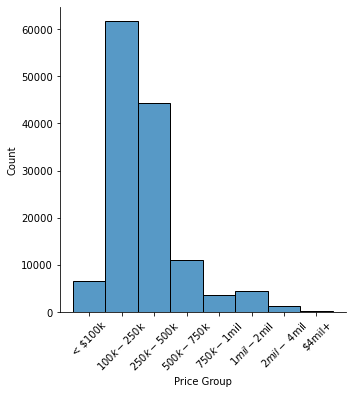

In [25]:
import seaborn as sns
#Generate a bar graph showing the distribution of total sales in each price group

sns.displot(sold_mls_df["Price Group"], binwidth=50, discrete=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sold_mls_df.head()